<a href="https://colab.research.google.com/github/kishordgupta/clustering_FGSM_VS_MNIST/blob/main/Clustering_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline

import chart_studio
chart_studio.tools.set_credentials_file(username='xx', api_key='xx')
mnist_data = pd.read_csv("./sample_data/mnist_train_small.csv")
#mnist_data = pd.read_csv('fgsm.csv')
#test = pd.read_csv('./sample_data/mnist_test.csv')
#train = pd.read_csv('./sample_data/mnist_train_small.csv')
#test = pd.read_csv('./sample_data/mnist_test.csv')

In [ ]:
pip install chart_studio

     |████████████████████████████████| 71kB 2.0MB/s 


In [ ]:
# have a general view of the MNIST dataset
mnist_data.head()

,11,37,6,0,2,39,51,51.1,41,3,0.1,3.1,40,41.1,4,36,44,43,42,7,36.1,52,52.1,52.2,51.2,51.3,49,8,46,8.1,0.2,1,6.1,5,47,49.1,11.1,6.2,5.1,1.1,...,13.9,41.13,14.7,39.11,11.6,6.21,8.12,42.14,50.24,48.21,8.13,8.14,8.15,1.20,0.48,0.49,0.50,0.51,0.52,0.53,1.21,7.21,1.22,6.22,1.23,6.23,1.24,5.19,1.25,6.24,1.26,5.20,0.54,0.55,0.56,6.25,8.16,7.22,1.27,0.57
0,8,8,9,11,41,51,51,52,52,51,51,40,3,0,0,8,45,52,51,52,40,6,35,14,36,50,49,8,49,49,44,39,8,47,52,46,45,50,51,15,...,37,11,10,41,11,7,3,41,44,46,8,8,1,0,0,0,0,0,0,0,0,0,0,3,37,6,0,0,7,2,37,46,6,37,43,13,8,7,1,0
1,41,14,39,51,49,11,4,41,52,50,13,1,10,44,16,44,9,0,2,44,44,11,8,7,1,0,0,0,6,36,13,47,52,47,4,4,41,46,42,15,...,42,13,35,11,41,12,1,0,0,0,0,0,6,0,1,7,0,4,40,40,38,1,0,0,2,43,8,0,6,1,7,2,6,0,0,0,0,0,0,0
2,11,37,9,39,43,43,43,43,43,43,50,52,41,14,44,8,0,2,38,44,41,13,39,51,51,49,5,0,41,6,5,8,9,3,2,2,3,10,48,42,...,51,48,13,6,0,0,0,0,0,0,0,8,8,8,7,1,2,38,44,43,43,42,43,50,44,48,7,6,8,7,0,0,0,0,0,0,0,0,0,0
3,0,0,4,41,44,43,44,51,52,52,52,45,43,43,48,7,6,8,7,0,0,2,38,51,51,52,49,8,7,6,0,1,2,7,7,42,46,45,44,8,...,53,50,44,43,51,50,50,44,42,11,1,8,8,8,8,8,11,35,3,3,44,16,35,11,1,2,38,51,49,13,8,12,45,14,8,8,8,0,0,0
4,48,13,7,0,0,0,0,3,40,44,43,44,41,12,8,8,8,7,1,0,0,0,2,45,53,52,49,7,52,50,44,8,5,0,0,0,1,2,8,2,...,44,47,9,3,36,7,35,8,5,1,0,9,8,2,7,8,8,8,7,1,0,0,4,37,5,0,0,0,8,46,44,7,7,2,7,1,0,0,0,0


In [ ]:
# for clean only
new_column_name = ['label']
for num in range(mnist_data.shape[1]-1):
    tem = 'pixel' + str(num)
    new_column_name.append(tem)

mnist_data.columns = new_column_name

In [ ]:
# for adversariAL only
new_column_name = []
for num in range(mnist_data.shape[1]-1):
    tem = 'pixel' + str(num)
    new_column_name.append(tem)

new_column_name.append('label')

mnist_data.columns = new_column_name

In [ ]:
# Check the new column name
mnist_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,8,8,9,11,41,51,51,52,52,51,51,40,3,0,0,8,45,52,51,52,40,6,35,14,36,50,49,8,49,49,44,39,8,47,52,46,45,50,51,15,...,37,11,10,41,11,7,3,41,44,46,8,8,1,0,0,0,0,0,0,0,0,0,0,3,37,6,0,0,7,2,37,46,6,37,43,13,8,7,1,0
1,41,14,39,51,49,11,4,41,52,50,13,1,10,44,16,44,9,0,2,44,44,11,8,7,1,0,0,0,6,36,13,47,52,47,4,4,41,46,42,15,...,42,13,35,11,41,12,1,0,0,0,0,0,6,0,1,7,0,4,40,40,38,1,0,0,2,43,8,0,6,1,7,2,6,0,0,0,0,0,0,0
2,11,37,9,39,43,43,43,43,43,43,50,52,41,14,44,8,0,2,38,44,41,13,39,51,51,49,5,0,41,6,5,8,9,3,2,2,3,10,48,42,...,51,48,13,6,0,0,0,0,0,0,0,8,8,8,7,1,2,38,44,43,43,42,43,50,44,48,7,6,8,7,0,0,0,0,0,0,0,0,0,0
3,0,0,4,41,44,43,44,51,52,52,52,45,43,43,48,7,6,8,7,0,0,2,38,51,51,52,49,8,7,6,0,1,2,7,7,42,46,45,44,8,...,53,50,44,43,51,50,50,44,42,11,1,8,8,8,8,8,11,35,3,3,44,16,35,11,1,2,38,51,49,13,8,12,45,14,8,8,8,0,0,0
4,48,13,7,0,0,0,0,3,40,44,43,44,41,12,8,8,8,7,1,0,0,0,2,45,53,52,49,7,52,50,44,8,5,0,0,0,1,2,8,2,...,44,47,9,3,36,7,35,8,5,1,0,9,8,2,7,8,8,8,7,1,0,0,4,37,5,0,0,0,8,46,44,7,7,2,7,1,0,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'Distribution of MNIST Images')

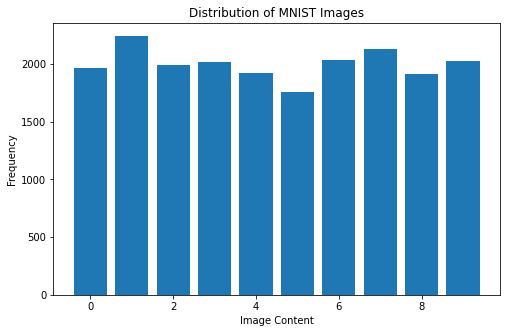

In [ ]:
# The general view of the 0-9 numbers distribution
from collections import defaultdict
num_stats = defaultdict(int)

for num in mnist_data['label']:
    num_stats[num] += 1

x = sorted(num_stats)
y = [num_stats[num] for num in x]

plt.figure(figsize=(8,5))
plt.bar(x, height=y)
plt.xlabel("Image Content")
plt.ylabel("Frequency")
plt.title("Distribution of MNIST Images")

In [ ]:
# Check the shape of the dataset
print(mnist_data.shape)

(9989, 785)


In [ ]:
# Check if NaN values existing
mnist_data.dropna().shape

(9989, 785)

In [ ]:
# get rid of unnecessary variables and make independent and dependent variable for later dataset split
result = mnist_data["label"]  # dependent variable
predictors = mnist_data.drop(["label"], axis = 1) #independent variable

In [ ]:
# plot some of the MNIST numbers
plt.figure(figsize=(15,15))
# plot 40 pictures
for i in range(0,40):
    plt.subplot(9,10,i + 1)
    # reshape from 1d to 2d pixel array
    grid_data = predictors.iloc[i].as_matrix().reshape(28,28)
    plt.imshow(grid_data, interpolation = "bicubic", cmap = "afmhot")
    # hide x, y axes
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [ ]:
# Get the matrix of training data
X = predictors.values

In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Text(0.5, 1.0, "Single Variable's Exlained Variance")

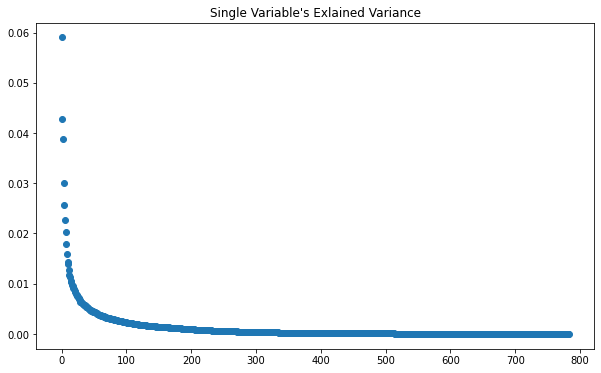

In [ ]:
# Determine explained variance of each variables
from sklearn.decomposition import PCA

pca = PCA(n_components=784).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(784)), pca.explained_variance_ratio_)
plt.title("Single Variable's Exlained Variance")

Text(0.5, 1.0, "Cumulative Variable's Exlained Variance")

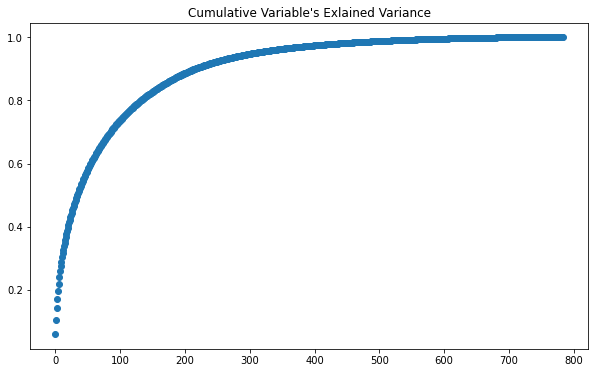

In [ ]:
# Determine explained variance of cumulative variables
from sklearn.decomposition import PCA

pca = PCA(n_components=784).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(784)), pca.explained_variance_ratio_.cumsum())
plt.title("Cumulative Variable's Exlained Variance")

In [ ]:
# Get top 40 PCA components
from sklearn.decomposition import PCA
n_components = 40
pca = PCA(n_components=40).fit(X_std)
pca.explained_variance_ratio_

array([0.0590205 , 0.04282781, 0.03885631, 0.02998139, 0.02575907,
       0.02275125, 0.02020349, 0.01797757, 0.01599155, 0.01442543,
       0.01399004, 0.01271779, 0.0116947 , 0.01141089, 0.01064179,
       0.01026194, 0.00976467, 0.00958289, 0.0091624 , 0.00900133,
       0.00855698, 0.00843885, 0.00800385, 0.00775023, 0.00758217,
       0.00735629, 0.00721284, 0.00692646, 0.00666027, 0.00638487,
       0.0062891 , 0.00619359, 0.00610972, 0.00592565, 0.00584962,
       0.00581034, 0.00563196, 0.00549985, 0.00532273, 0.00526268])

In [ ]:
# Transform to images
eigen_40 = pca.components_.reshape(n_components,28, 28)

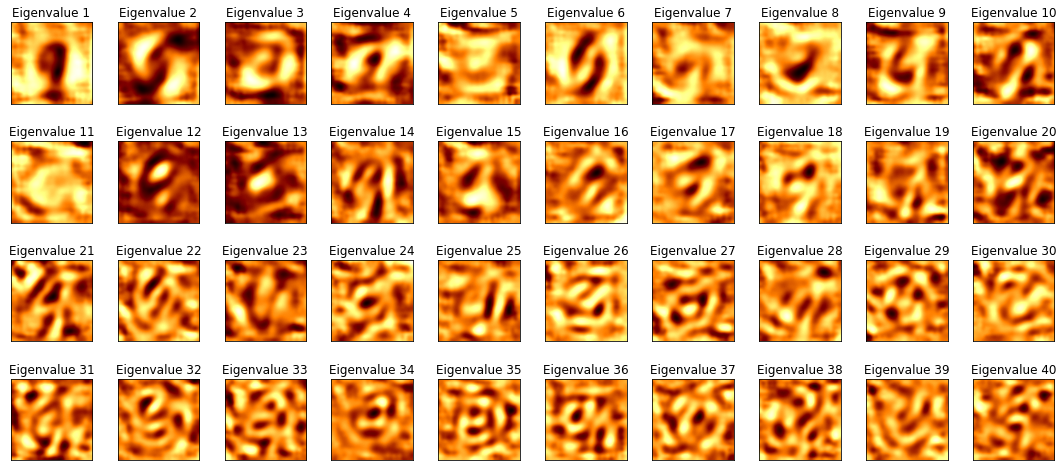

In [ ]:
# Plot the first 40 eignenvalues
plt.figure(figsize=(15,15))
for i in list(range(40)):
    plt.subplot(9, 10, i + 1)
    plt.imshow(eigen_40[i], interpolation = "bicubic", cmap = "afmhot")
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=12)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()

In [ ]:
# Randomly pick 2000 rows
data_sample = mnist_data.sample(2000)

data_y = data_sample["label"]  # dependent variable
data_x = data_sample.drop(["label"], axis = 1) #independent variable

# PCA

In [ ]:
# Standardising the values
pca_std = StandardScaler().fit_transform(data_x.values)

# Call the PCA method with 2 components. 
pca = PCA(n_components=2)
x_2 = pca.fit(pca_std).transform(pca_std)

In [ ]:
# Use Plotly to plot PCA
data = [go.Scatter(
    x = x_2[:,0],
    y = x_2[:,1],
    mode = 'markers',
    showlegend = False,
    marker = dict(
        size = 8,
        color = data_y,
        colorscale ='Rainbow',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 128, 128)'
        ),
        opacity = 0.8
    )
)]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
chart_studio.plotly.iplot(fig, filename='PCA_plot')

# KMeans (Assume the MNIST data doesn't have labels)

In [ ]:
from sklearn.cluster import KMeans
# Set a KMeans clustering with 9 components cuz there are 9 class labels
kmeans = KMeans(n_clusters=10)
# Compute cluster centers and predict cluster indices
kmeans_9 = kmeans.fit_predict(x_2)

data = [
    go.Scatter(
        x= x_2[:, 0], 
        y= x_2[:, 1], 
        mode="markers",
        showlegend=False,
        marker=dict(
            size=8,
            color = kmeans_9,
            colorscale = 'Rainbow',
            showscale=False, 
            line = dict(
                width = 2,
                color = 'rgb(255, 255, 255)'
            )))]

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)

fig = dict(data = data, layout = layout)
chart_studio.plotly.iplot(fig, filename="kmeans_plot")

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

x_lda = lda.fit_transform(data_x, data_y)

In [ ]:
# Plot LDA graph
data = [
    go.Scatter(
    x = x_lda[:,0],
    y = x_lda[:,1],
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = data_y,
        colorscale ='Rainbow',
        showscale = False,
        opacity = 0.8,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
    )
)]

layout = go.Layout(
    title= 'Linear Discriminant Analysis (LDA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Linear Discriminant',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Linear Discriminant',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = dict(data=data, layout=layout)
chart_studio.plotly.iplot(fig, filename='lda_plot')

## TSNE

In [ ]:
from sklearn.manifold import TSNE
# Invoking the t-SNE method
tsne = TSNE()
x_tsne = tsne.fit_transform(data_x) 

In [ ]:
# Plot TSNE graph
data = [
    go.Scatter(
    x = x_tsne[:,0],
    y = x_tsne[:,1],
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = data_y,
        colorscale ='Rainbow',
        showscale = False,
        opacity = 0.8,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
    )
)]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,

             )

fig = dict(data=data, layout=layout)
chart_studio.plotly.iplot(fig, filename='TSNE_plot')